<div style="text-align:center; font-size:29px; font-family:'Georgia'; font-weight:bold; color:plum;">
    Lista 5
</div>

**Zadanie 1**

Gęstość powietrza $\rho$ zmienia się z wysokością $h$ w sposób przedstawiony w tabeli:

| $h$ (km) | $\rho$ (kg/$m^3$) |
|--------------|------------------------|
| 0            | 1,225                  |
| 3            | 0,905                  |
| 6            | 0,652                  |

Zadanie polega na wyrażeniu $\rho(h)$ jako funkcji kwadratowej w $h$, czyli w postaci:
$$
\rho(h) = a h^2 + b h + c
$$
gdzie \( a \), \( b \), i \( c \) są współczynnikami, które należy wyznaczyć.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math
from scipy.optimize import fsolve
from numpy.linalg import solve
from scipy.interpolate import interp1d

Funka **poly_interpol** implementuje wielomianową interpolację Lagrange'a, tworząc wielomian przechodzący przez podane punkty (𝑥,𝑦).

In [22]:
def poly_interpol(x, y):
    #Tworzymy wielomian omega(x), który jest iloczynem (x - x0)(x - x1)...(x - xn-1)
    omega = np.poly1d([1])
    n = len(x)  

    #Iteracyjnie mnożymy omega(x) przez (x - xi) dla każdego węzła xi
    for xi in x:
        omega *= np.poly1d([1, -xi])  

    #Obliczamy pochodną omega'(x)
    omega_p = np.polyder(omega)

    #Inicjalizujemy wielomian interpolujący w(x) jako wielomian zerowego stopnia 
    w = np.poly1d([0])

    #Obliczamy sumę y[i] * L_i(x) dla każdego i, gdzie L_i(x) to wielomian bazowy
    for i in range(n):
        omega_px = omega_p(x[i])
        pol, rem = np.polydiv(omega, np.poly1d([1, -x[i]]))
        pol = pol / omega_px  
        w += y[i] * pol
    return w



ten kod również implementuje interpolację Lagrange'a, ale w inny sposób. Zamiast korzystać z iloczynowego wielomianu ω(x) (jak w poprzednim kodzie), tutaj bezpośrednio oblicza się wielomiany bazowe $L_i$(x) w trakcie pętli. 

In [4]:
def poly_interpol2(x,y): 
    n = len(x)
    X = np.poly1d([1,0])
    poly = 0
    for i in range(n):
        w = 1
        for j in range(n):
            if i != j:
                w *= ((X-x[j]) / (x[i]-x[j]))
        poly += w * y[i]
    return poly


In [5]:
x, y = [0,3000,6000], [1.255, 0.905, 0.652]

In [6]:
print(poly_interpol(np.array(x), np.array(y)))
print(poly_interpol2(np.array(x), np.array(y)))

           2
5.389e-09 x - 0.0001328 x + 1.255
           2
5.389e-09 x - 0.0001328 x + 1.255


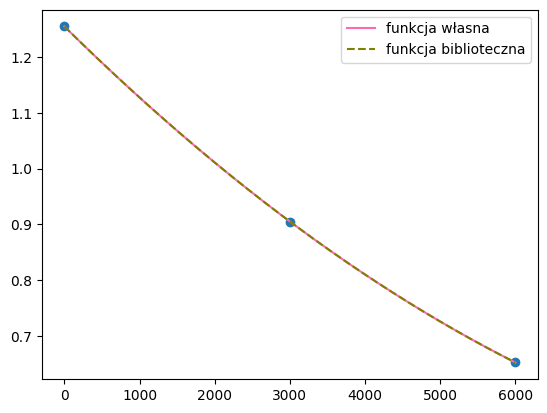

In [10]:
interpolation_build_in = interp1d(x,y,"quadratic")
interpolation_self = poly_interpol(x,y)
interpolation_self2 = poly_interpol2(np.array(x), np.array(y))

x_lin = np.linspace(0,6000,1000)
plt.plot(x_lin, interpolation_self(x_lin), label="funkcja własna", color="hotpink")
plt.scatter(x, y)
plt.plot(x_lin, interpolation_build_in(x_lin), label="funkcja biblioteczna", linestyle='--', color="olive")
plt.legend(loc="best")
plt.show()


**Zadanie 2**

W poniższej tabeli przedstawiony jest współczynnik oporu $c_D$ sfery w cieczy jako funkcja liczby Reynoldsa $Re$. Korzystając z naturalnych funkcji sklejanych, znajdź $c_D$ dla $Re = 5, 50, 5000$

| $Re$  | 0.2  | 2    | 20   | 200  | 2000  | 20000 |
|----------|-------|------|------|------|-------|-------|
| $c_D$  | 103   | 13.9 | 2.72 | 0.8  | 0.401 | 0.433 |


In [2]:
from scipy.interpolate import CubicSpline

In [3]:
spl = CubicSpline([0.2, 2, 20, 200, 2000, 20000], [103, 13.9, 2.72, 0.8, 0.401, 0.433])

In [24]:
Re = [5, 50, 5000]
for r in Re:
    print(f"Wartość dla Re = {r}:\nc = {spl(r)}")

Wartość dla Re = 5:
c = -84.02350372537349
Wartość dla Re = 50:
c = 436.413792186683
Wartość dla Re = 5000:
c = 54738.99116845934


**tworzenie wykresu**

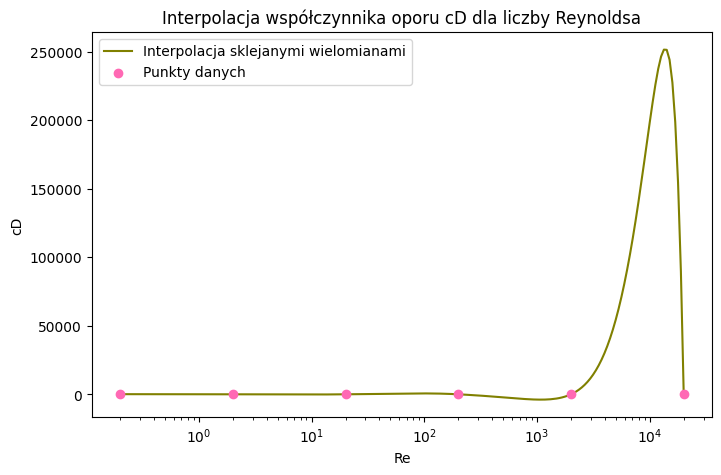

In [27]:
Re1 = [0.2, 2, 20, 200, 2000, 20000]
cD = [103, 13.9, 2.72, 0.8, 0.401, 0.433]
spl = CubicSpline(Re1, cD)

Re_plot = np.logspace(np.log10(min(Re1)), np.log10(max(Re1)), 200)
cD_plot = spl(Re_plot)


plt.figure(figsize=(8, 5))
plt.plot(Re_plot, cD_plot, label="Interpolacja sklejanymi wielomianami", color='olive')
plt.scatter(Re1, cD, color='hotpink', label="Punkty danych", zorder=3)
plt.xscale("log")
plt.xlabel("Re")
plt.ylabel("cD")
plt.title("Interpolacja współczynnika oporu cD dla liczby Reynoldsa")
plt.legend()
plt.show()


**Zadanie 3**

W tym zadaniu wykorzystamy zaimplementowany w zad 1 kod na interpolacje wielomianową

In [25]:
print("Interpolacja wielomianowa ")
c_d = poly_interpol([0.2, 2, 20, 200, 2000, 20000], [103, 13.9, 2.72, 0.8, 0.401, 0.433])
for r in Re:
    print(f"Wartość dla Re = {r}:\nc = {c_d(r)}")

Interpolacja wielomianowa 
Wartość dla Re = 5:
c = -96.10046207185488
Wartość dla Re = 50:
c = 2581.144117967352
Wartość dla Re = 5000:
c = 1658455172.0854998


Rozwiązanie przy pomocy funkcji bibliotecznych

In [15]:
import numpy as np

Re_values = [0.2, 2, 20, 200, 2000, 20000]
cD_values = [103, 13.9, 2.72, 0.8, 0.401, 0.433]

degree = len(Re_values) - 1

coeffs = np.polyfit(Re_values, cD_values, degree)
poly_func = np.poly1d(coeffs)

Re_points = [5, 50, 5000]


print("Interpolacja wielomianowa za pomocą funkcji bibliotecznej:")
for r in Re_points:
    print(f"Wartość dla Re = {r}:\n c = {poly_func(r):.4f}")


Interpolacja wielomianowa za pomocą funkcji bibliotecznej:
Wartość dla Re = 5:
 c = -96.1005
Wartość dla Re = 50:
 c = 2581.1451
Wartość dla Re = 5000:
 c = 1658455817.9120


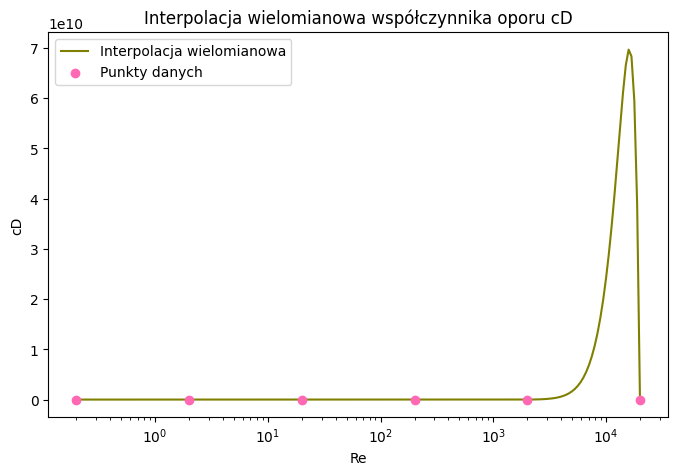

In [17]:
Re_plot_poly = np.logspace(np.log10(min(Re_values)), np.log10(max(Re_values)), 200)
cD_plot_poly = poly_func(Re_plot_poly)

plt.figure(figsize=(8, 5))
plt.plot(Re_plot_poly, cD_plot_poly, label="Interpolacja wielomianowa", color='olive')
plt.scatter(Re_values, cD_values, color='hotpink', label="Punkty danych", zorder=3)
plt.xscale("log")
plt.xlabel("Re")
plt.ylabel("cD")
plt.title("Interpolacja wielomianowa współczynnika oporu cD")
plt.legend()
plt.show()

**Zadanie 4**

Wyznacz parametry $a$ i $b$ tak, aby funkcja $f(x) = ae^{bx}$ aproksymowała poniższe dane w sensie najmniejszych kwadratów.

| $x$   | 1.2  | 2.8  | 4.3  | 5.4  | 6.8  | 7.9   |
|---------|-------|------|------|------|-------|-------|
| $y$   | 7.5   | 16.1 | 38.9 | 67.0 | 146.6 | 266.2 |

Policz odchylenie standardowe. Wyniki przedstaw na wykresie.


Nakładamy logarytm na funkcję aproksymującą $f$
$$
g(x) = \ln(f) = \ln(ae ^ {bx}) = \ln(a) + bx = c + bx
$$

I robimy klasyczną regresję liniową dla funkcji $g$. Wzory:
$$
b = \frac{\sum(X_i - \overline{X})(Y_i - \overline{Y})}{\sum(X_i - \overline{X})^{2}}
$$
$$
c = \overline{Y} - b\overline{X}
$$

In [26]:
def regresja_liniowa(x,y):
    b = np.sum((x-np.mean(x)) * (y - np.mean(y)))/np.sum((x - np.mean(x))**2)
    c = np.mean(y) - b * np.mean(x)
    return b, c

xs = np.array([1.2,2.8,4.3,5.4,6.8,7.9])
ys = np.array([7.5,16.1,38.9,67.0,146.6,266.2])
ys_log = np.log(ys)

In [27]:
b, c = regresja_liniowa(xs, ys_log)
a = np.exp(c)
f_approx = lambda x: a * np.exp(b * x)

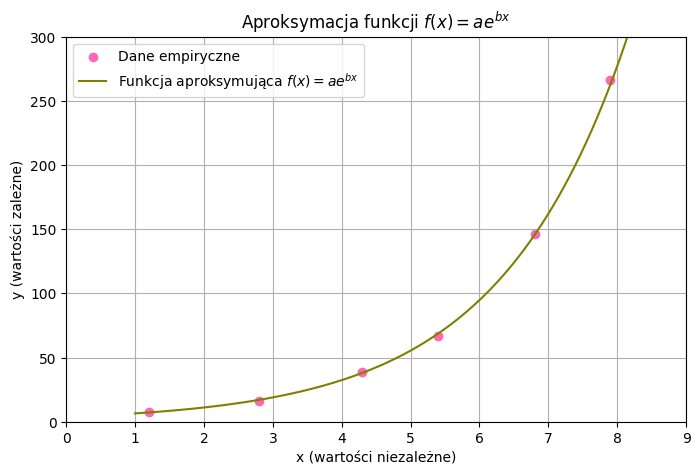

In [ ]:
x_lin = np.linspace(1,9,1000)
y_approx = f_approx(x_lin)

plt.figure(figsize=(8, 5))
plt.scatter(xs, ys, c="hotpink", label="Dane empiryczne")
plt.plot(x_lin, y_approx, color="olive", label="Funkcja aproksymująca $f(x) = ae^{bx}$")
plt.ylim(0, 300)
plt.xlim(0, 9)
plt.xlabel("x (wartości niezależne)")
plt.ylabel("y (wartości zależne)")
plt.title("Aproksymacja funkcji $f(x) = ae^{bx}$")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [31]:
y_approx2 = f_approx(xs)
errors = ys - y_approx2
print(f"Odchylenie standardowe błędów: {np.std(errors)}")

Odchylenie standardowe błędów: 1.6397439579596658


**Zadanie 5**

Kinematyczna lepkość wody $\mu_k$ zmienia się z temperaturą $T$ według poniższej tabeli. Wyznacz wielomian trzeciego stopnia, który najlepiej aproksymuje te dane i skorzystaj z niego do obliczenia $\mu_k$ dla $T = 10^\circ$, $30^\circ$, $60^\circ$ i $90^\circ$.

| $T \, (^\circ \mathrm{C})$ | 0   | 21.1 | 37.8 | 54.4 | 71.1 | 87.8 | 100   |
|-------------------------------|------|-------|-------|-------|-------|-------|-------|
| $ \mu_k \, (10^{-6} \, \mathrm{m}^2/\mathrm{s})$ | 1.79 | 1.13  | 0.696 | 0.519 | 0.338 | 0.321 | 0.296 |


In [4]:
def poly_approximation(m, x, y):
    mat = np.zeros((m+1, m+1))
    b = np.zeros(m+1)
    for i in range(m+1):
        for k in range(m+1):
            mat[i][k] = np.sum(x ** (i + k))
        b[i] = np.sum(y * x ** i)
    coeffs = solve(mat, b)
    return np.flip(coeffs)

In [5]:
x, y = np.array([0,21.1,37.8,54.4, 71.1, 87.8, 100]), np.array([1.79,1.13,0.696,0.519,0.338, 0.321, 0.296])

poly_approx = np.poly1d(poly_approximation(3, x, y))
poly_approx_build_in = np.poly1d(np.polyfit(x, y, deg=3))

x2 = [10, 30, 60, 90]

for x in x2:
    print(f"Wynik aproksymacji własnej dla T = {x}: {poly_approx(x)}\n")
    print(f"Wynik aproksymacji wbudowanej dla T = {x}: {poly_approx_build_in(x)}\n")

Wynik aproksymacji własnej dla T = 10: 1.4345071783718422

Wynik aproksymacji wbudowanej dla T = 10: 1.4345071783718326

Wynik aproksymacji własnej dla T = 30: 0.8889438745121663

Wynik aproksymacji wbudowanej dla T = 30: 0.8889438745121374

Wynik aproksymacji własnej dla T = 60: 0.436569740092396

Wynik aproksymacji wbudowanej dla T = 60: 0.43656974009240535

Wynik aproksymacji własnej dla T = 90: 0.30155298339004166

Wynik aproksymacji wbudowanej dla T = 90: 0.3015529833900532



**Tworzenie wykresu**

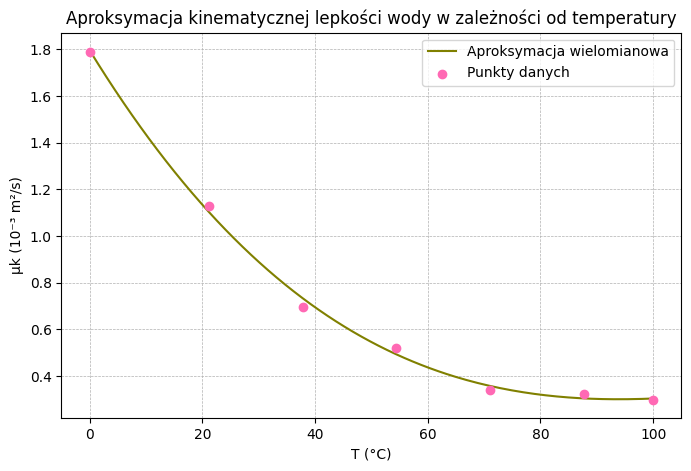

In [30]:
T_v = np.array([0, 21.1, 37.8, 54.4, 71.1, 87.8, 100])
mu_k_v = np.array([1.79, 1.13, 0.696, 0.519, 0.338, 0.321, 0.296])

degree = 3
poly_coeffs = np.polyfit(T_v, mu_k_v, degree)
poly_func = np.poly1d(poly_coeffs)

T_plot = np.linspace(min(T_v), max(T_v), 200)
mu_k_plot = poly_func(T_plot)

plt.figure(figsize=(8, 5))
plt.plot(T_plot, mu_k_plot, label="Aproksymacja wielomianowa", color='olive')
plt.scatter(T_v, mu_k_v, color='hotpink', label="Punkty danych", zorder=3)
plt.xlabel("T (°C)")
plt.ylabel("μk (10⁻³ m²/s)")
plt.title("Aproksymacja kinematycznej lepkości wody w zależności od temperatury")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()


**Zadanie 6**

Dopasuj funkcję liniową i kwadratową do danych.

| \(x\)   | 1.0  | 2.5  | 3.5  | 4.0  | 1.1  | 1.8  | 2.2  | 3.7   |
|---------|-------|-------|-------|-------|-------|-------|-------|-------|
| \(y\)   | 6,008 | 15,722 | 27,13 | 33,772 | 5,257 | 9,549 | 11,098 | 28,828 |

Wyniki przedstaw na wykresie. Która aproksymacja jest lepsza?


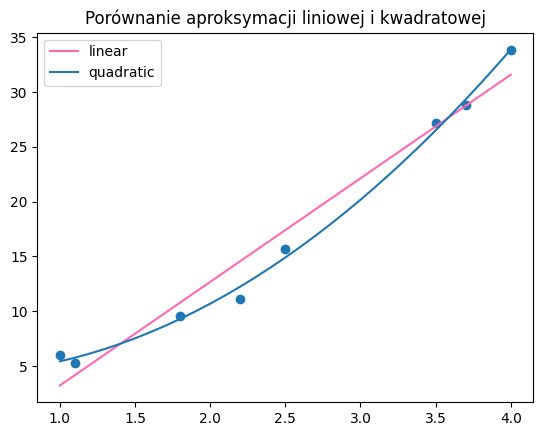

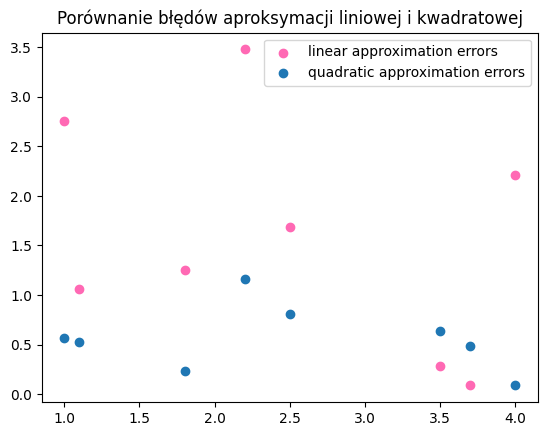

MSE dla aproksymacji liniowej: 3.7752
MSE dla aproksymacji kwadratowej: 0.4130


In [6]:
x = np.array([1.0, 2.5, 3.5, 4.0, 1.1, 1.8, 2.2, 3.7])
y = np.array([6.008, 15.722, 27.13, 33.772, 5.257, 9.549, 11.098, 28.828])

linear_approx = np.poly1d(poly_approximation(1, x, y))
quadratic_approx = np.poly1d(poly_approximation(2, x, y))

x_lin = np.arange(1, 4.1, 0.1)

plt.scatter(x, y)
plt.plot(x_lin, linear_approx(x_lin), label="linear", color="hotpink")
plt.title("Porównanie aproksymacji liniowej i kwadratowej")
plt.plot(x_lin, quadratic_approx(x_lin), label="quadratic")
plt.legend(loc="best")
plt.show()

linear_approx_values = linear_approx(x)
quadratic_approx_values = quadratic_approx(x)
errors_linear = abs(linear_approx_values - y)
errors_quadratic = abs(quadratic_approx_values - y)

plt.scatter(x, errors_linear, label="linear approximation errors", color="hotpink")
plt.title("Porównanie błędów aproksymacji liniowej i kwadratowej")
plt.scatter(x, errors_quadratic, label="quadratic approximation errors")
plt.legend(loc="best")
plt.show()

mse_linear = np.mean((y - linear_approx_values)**2)
mse_quadratic = np.mean((y - quadratic_approx_values)**2)

print(f"MSE dla aproksymacji liniowej: {mse_linear:.4f}")
print(f"MSE dla aproksymacji kwadratowej: {mse_quadratic:.4f}")

*Wnioski*

- MSE dla aproksymacji liniowej wynosi 3.7752, co wskazuje na większy błąd w dopasowaniu danych do modelu liniowego.
- MSE dla aproksymacji kwadratowej wynosi 0.4130, co oznacza znacznie mniejszy błąd w porównaniu do aproksymacji liniowej.
- Aproksymacja kwadratowa znacznie lepiej opisuje dane niż aproksymacja liniowa, co wynika z niższej wartości średniego błędu kwadratowego (MSE).
- Wartość MSE dla aproksymacji kwadratowej jest około 9 razy mniejsza niż dla aproksymacji liniowej, co potwierdza, że model kwadratowy lepiej dopasowuje się do danych o nieliniowym charakterze.